In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '/home/unimelb.edu.au/mbergemann/workspace/karabo_data')
from karabo_data import RunDirectory, stack_detector_data
from karabo_data.geometry2 import AGIPD_1MGeometry
from tempfile import TemporaryDirectory
from geoAssembler.tests.utils import create_test_directory
import karabo_data

In [2]:
geom = AGIPD_1MGeometry.from_quad_positions(quad_pos=[
        (-525, 625),
        (-550, -10),
        (520, -160),
        (542.5, 475),
    ])
karabo_data.__file__

'/home/unimelb.edu.au/mbergemann/workspace/karabo_data/karabo_data/__init__.py'

In [3]:
with TemporaryDirectory() as td: 
    create_test_directory(td, det='AGIPD')
    run = RunDirectory(td)
    tid, train_data = run.select('*/DET/*', 'image.data').train_from_index(0)
    stacked = stack_detector_data(train_data, 'image.data')
    stacked_pulse = stacked[4]

Compare single pulse vs train avg

<IPython.core.display.Javascript object>


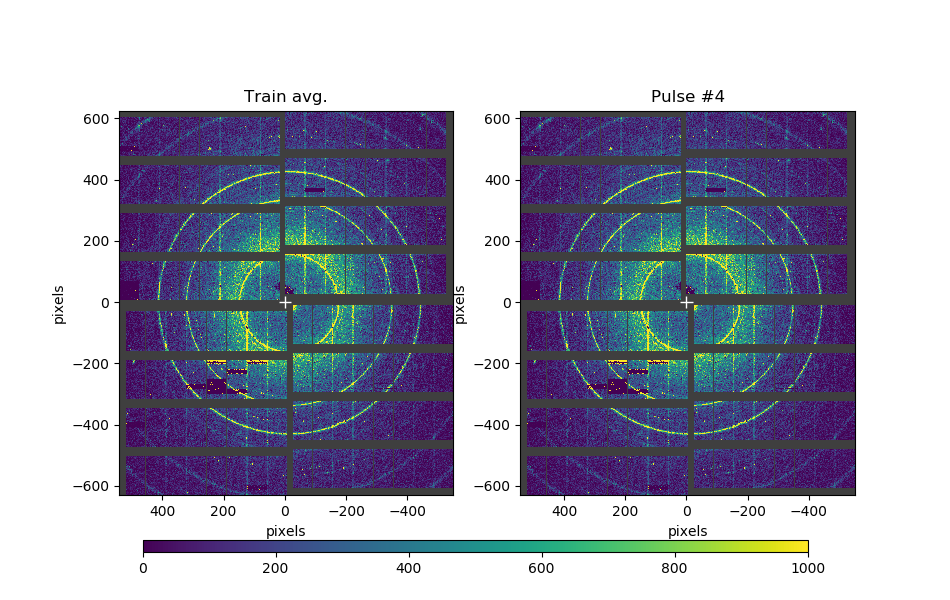

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(9.5, 6))
cax = fig.add_axes([0.15,0.08,0.7,0.02])
axes[0] = geom.plot_data_fast(stacked_pulse, figsize=(6,6), vmin=0, vmax=1000, ax=axes[0], cax=cax,
                         cbar_args={'shrink':0.6, 'pad':0.1, 'orientation':'horizontal'})
axes[0].set_title('Train avg.')
axes[1] = geom.plot_data_fast(stacked.mean(axis=0), figsize=(6,6), vmin=0, vmax=1000, ax=axes[1])
_ = axes[1].set_title('Pulse #4')

## Converting array positions to physical positions

We can also convert array coordinates within the detector data into real (x, y, z) positions in metres.

In [5]:
# Generate some array coordinates, one in each module
module_no = np.arange(0, 16)
# For AGIPD, slow-scan is the x dimension, increasing from the edges towards the centre
slow_scan = np.linspace(10, 500, num=16)
fast_scan = np.full(fill_value=40.1, shape=16)  # Fixed y position in each module

positions.shape = (16, 3)


<IPython.core.display.Javascript object>


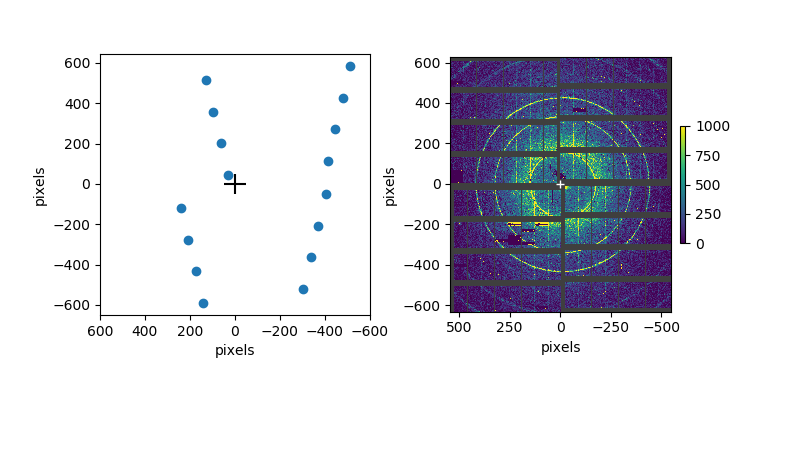

In [6]:
positions = geom.data_coords_to_positions(module_no, slow_scan, fast_scan)
print("positions.shape =", positions.shape)  # (point, x/y/z)

# Convert metres to pixel units to compare with plots above
px = positions[:, 0] / geom.pixel_size
py = positions[:, 1] / geom.pixel_size

fig, axes = plt.subplots(1, 2, figsize=(8, 4.5))
axes[0].scatter(px, py)

axes[0].set_xlabel('pixels')
axes[0].set_ylabel('pixels')
axes[0].hlines(0, -50, 50)  # Draw a cross at the origin
axes[0].vlines(0, -50, 50)  #
axes[0].set_xlim(600, -600)  # Invert x-axis to match plots above

axes[1] = geom.plot_data_fast(stacked_pulse, figsize=(6,6), vmin=0, vmax=1000, ax=axes[1],
                         cbar_args={'shrink':0.45, 'pad':0.03, 'orientation':'vertical'})
fig.subplots_adjust(bottom=0.3, wspace=0.3)